## Testing model on unknown image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.utils import load_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt

import os

import matplotlib as plt

## Loading the Model

In [ ]:
MODEL_PATH = './models/art_style_cnn.keras'
try:
    model = load_model(MODEL_PATH)
except Exception as e:
    exit()

✅ Model loaded successfully from: ./models/art_style_cnn.keras


In [22]:
class_names = ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 
               'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 
               'Romanticism', 'Symbolism', 'Western_Medieval']
TARGET_SIZE = (224, 224)
TEST_DIR = './test'
NUM_CLASSES = len(class_names)

In [23]:
test_images = []
filenames = []

test_files = [f for f in os.listdir(TEST_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(test_files)} images in {TEST_DIR}. Preparing for prediction...")

Found 2 images in ./test. Preparing for prediction...


In [24]:
for filename in test_files:
    image_path = os.path.join(TEST_DIR, filename)

    img = tf.keras.utils.load_img(image_path) 
    img_array = tf.keras.utils.img_to_array(img)

    test_images.append(img_array)
    filenames.append(filename)

image_batch = np.array(test_images)

image_batch

array([[[[218., 182., 113.],
         [217., 182., 114.],
         [217., 181., 114.],
         ...,
         [210., 176., 109.],
         [214., 178., 111.],
         [213., 177., 110.]],

        [[218., 182., 114.],
         [215., 179., 111.],
         [215., 180., 112.],
         ...,
         [215., 180., 113.],
         [215., 179., 112.],
         [214., 179., 112.]],

        [[220., 184., 116.],
         [220., 184., 117.],
         [218., 182., 115.],
         ...,
         [216., 180., 113.],
         [217., 181., 115.],
         [214., 179., 112.]],

        ...,

        [[224., 183., 111.],
         [223., 181., 111.],
         [223., 181., 110.],
         ...,
         [196., 154.,  86.],
         [192., 150.,  82.],
         [192., 150.,  82.]],

        [[216., 173., 103.],
         [220., 177., 107.],
         [220., 177., 108.],
         ...,
         [201., 158.,  90.],
         [199., 158.,  90.],
         [200., 157.,  89.]],

        [[226., 184., 114.],
       

In [25]:
print("Running prediction...")
predictions = model.predict(image_batch)

Running prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


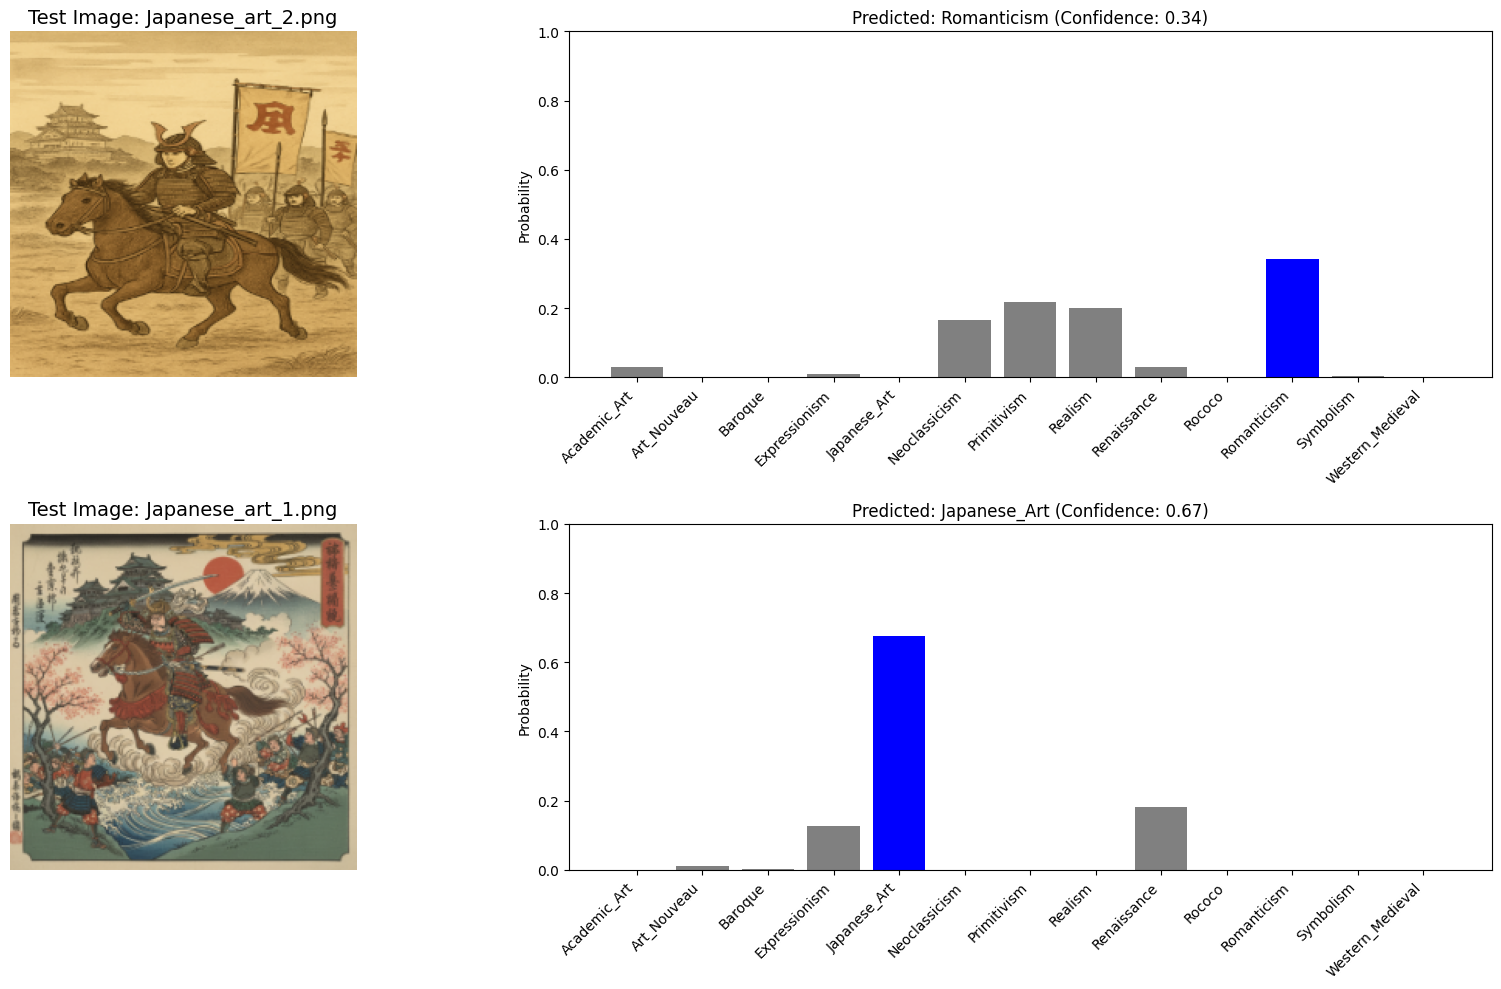

In [ ]:
plt.figure(figsize=(18, 5 * len(test_files)))

for i, probabilities in enumerate(predictions):
    filename = filenames[i]

    display_image = (image_batch[i] * 255).astype(np.uint8) if image_batch[i].max() <= 1.05 else image_batch[i].astype(np.uint8)
    
    predicted_label_index = np.argmax(probabilities)
    predicted_style = class_names[predicted_label_index]
    confidence = probabilities[predicted_label_index]

    plt.subplot(len(test_files), 2, 2*i + 1)
    plt.imshow(display_image)
    plt.title(f"Test Image: {filename}", fontsize=14)
    plt.axis("off")
    
    
    plt.subplot(len(test_files), 2, 2*i + 2)
    
    bar_colors = ['gray'] * NUM_CLASSES
    bar_colors[predicted_label_index] = 'blue'
    
    plt.bar(class_names, probabilities, color=bar_colors)
    plt.ylabel("Probability")
    plt.ylim([0, 1])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Predicted: {predicted_style} (Confidence: {confidence:.2f})")
    

plt.tight_layout()
plt.show()